<a href="https://colab.research.google.com/github/mdanyassri/Project-117/blob/main/Project_117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("BankNote_Authentication.csv")

print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

factors = df[["variance","skewness","curtosis","entropy"]]
scores =df["class"] 
factors_train, factors_test, scores_train, scores_test = train_test_split(factors, scores, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
factors_train = sc_x.fit_transform(factors_train)
factors_test = sc_x.fit_transform(factors_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(factors_train, scores_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
scores_prediction = classifier.predict(factors_test)

predicted_values = []
for i in scores_prediction:
  if i ==0:
    predicted_values.append("Authorized")
  else:
    predicted_values.append("Forged")

actual_values = []
for i in scores_test.ravel():
  if i ==0:
    actual_values.append("Authorized")
  else:
    actual_values.append("Forged")

[Text(0, 0.5, 'Forged'), Text(0, 1.5, 'Authorized')]

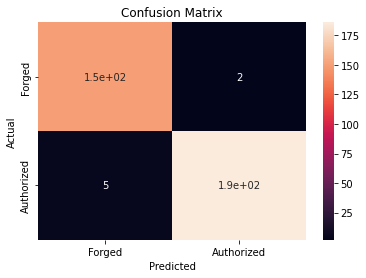

In [ ]:
labels = ["Forged", "Authorized"]
cm = confusion_matrix(actual_values, predicted_values, labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
tp, tn, fp, fn = confusion_matrix(scores_test, scores_prediction).ravel() 
print("True positive: ",tp)
print("True negative: ",tn)
print("False positive: ",fp) 
print("False negative: ",fn) 

True positive:  186
True negative:  5
False positive:  2
False negative:  150


In [ ]:
accuracy = (186 + 150)*100 / (150 + 186 + 5 + 2) 
print(accuracy)

97.95918367346938
